### Priya Sharma 
### PGA Batch 23

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
df=pd.read_csv("MonthWiseMarketArrivals_Clean.csv")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [3]:
df.shape

(10227, 10)

In [4]:
df.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [5]:
df.columns

Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city', 'date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [7]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date',inplace=True)
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
5399,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
5420,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
5441,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
5461,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
5481,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


## Q1. Get the modal price of onion for each month for the Mumbai market (Hint: set monthly date as index and drop redundant columns)

In [8]:
df.set_index('date',inplace=True)
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON


In [9]:
df1=df.loc[df.market == "MUMBAI"].copy()
df1.head(10)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2004-01-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI
2004-02-01,MUMBAI,February,2004,239350,614,834,736,MS,MUMBAI
2004-03-01,MUMBAI,March,2004,238000,436,557,498,MS,MUMBAI
2004-04-01,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI
2004-05-01,MUMBAI,May,2004,166430,357,466,405,MS,MUMBAI
2004-06-01,MUMBAI,June,2004,206500,396,530,455,MS,MUMBAI
2004-07-01,MUMBAI,July,2004,208400,385,514,445,MS,MUMBAI
2004-08-01,MUMBAI,August,2004,186300,394,533,461,MS,MUMBAI
2004-09-01,MUMBAI,September,2004,217750,384,523,444,MS,MUMBAI


In [10]:
df1 = df1.drop(["market","year","priceMin","priceMax","state","quantity"], axis=1)

In [11]:
df1.head()

,month,priceMod,city
date,,,
2004-01-01,January,849,MUMBAI
2004-02-01,February,736,MUMBAI
2004-03-01,March,498,MUMBAI
2004-04-01,April,397,MUMBAI
2004-05-01,May,405,MUMBAI


## ADF Test for Stationaarity 

In [12]:
def adf_test(data):
    res = adfuller(data)
    print('ADF-Test_Stat',res[0])
    print('p-val',res[1])
    if res[1]> 0.05:
        print('Ho accepted - Data is non-stationary')
    else:
        print('H1 accepted - Data is stationary')

In [13]:
adf_test(df1['priceMod'])

ADF-Test_Stat -4.437736321058302
p-val 0.00025436714348672925
H1 accepted - Data is stationary


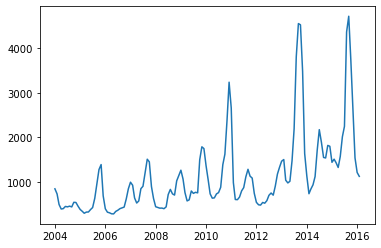

In [14]:
plt.plot(df1['priceMod'])
plt.show()

In [15]:
df2=df1.drop(columns=["month","city"],axis=1)
df2.head()

,priceMod
date,
2004-01-01,849
2004-02-01,736
2004-03-01,498
2004-04-01,397
2004-05-01,405


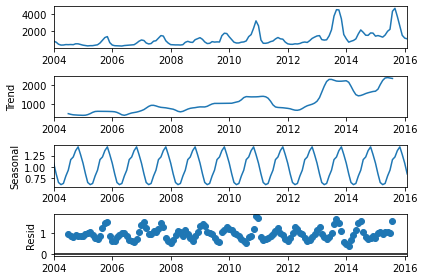

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df2, model='multiplicative')
result.plot()
plt.show()

## Plotting ACF and PACF
To check the value of q and p

### ACF
* `from the ACF plot below we get 'q'=17 (the value before the first value goes negative))`

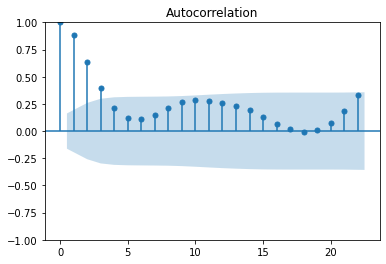

In [17]:
plot_acf(df1['priceMod'])
plt.show()

### PACF
* `from the PACF plot below we get 'p'=1 (the value before the first value goes negative))`

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


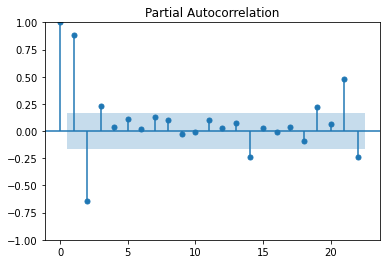

In [18]:
plot_pacf(df1['priceMod'])
plt.show()

## Splitting the data

In [19]:
df2=df1.drop(['month','city'],axis=1)
df2.head()

,priceMod
date,
2004-01-01,849
2004-02-01,736
2004-03-01,498
2004-04-01,397
2004-05-01,405


In [20]:
df2.shape

(146, 1)

In [21]:
117/146

0.8013698630136986

In [22]:
train= df2[:117]
test = df2[117:]
print(train.shape)
print(test.shape)

(117, 1)
(29, 1)


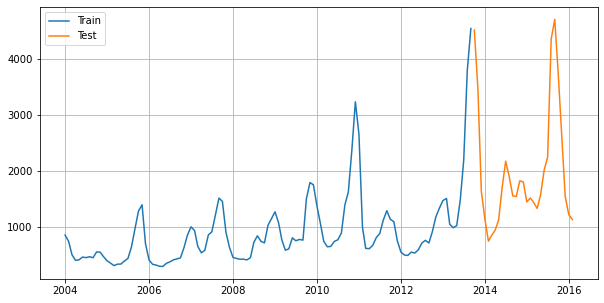

In [23]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.grid()
plt.legend()
plt.show()

In [24]:
print(train.tail(2))
print(test.head(2))

            priceMod
date                
2013-08-01      3803
2013-09-01      4550
            priceMod
date                
2013-10-01      4522
2013-11-01      3484


## User define Function for performance metric

In [25]:
def test_metrics(test,pred):
    mse = mean_squared_error(test,pred)
    rmse = mean_squared_error(test,pred,squared=False)
    return mse,rmse

## Base AR model (1,0,0)

In [26]:
from statsmodels.tsa.arima.model import ARIMA

In [27]:
m1 = ARIMA(train,order=(1,0,0))
ar_m1 = m1.fit()
print(ar_m1.summary())

                               SARIMAX Results                                
Dep. Variable:               priceMod   No. Observations:                  117
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -845.932
Date:                Mon, 19 Sep 2022   AIC                           1697.864
Time:                        16:24:12   BIC                           1706.150
Sample:                    01-01-2004   HQIC                          1701.228
                         - 09-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1451.3643    952.108      1.524      0.127    -414.733    3317.461
ar.L1          0.9629      0.036     26.577      0.000       0.892       1.034
sigma2      1.091e+05   6132.442     17.792      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [28]:
fcast_m1 = ar_m1.forecast(29)
fcast_m1

2013-10-01    4435.171439
2013-11-01    4324.598170
2013-12-01    4218.122501
2014-01-01    4115.592583
2014-02-01    4016.862197
2014-03-01    3921.790540
2014-04-01    3830.242027
2014-05-01    3742.086099
2014-06-01    3657.197034
2014-07-01    3575.453770
2014-08-01    3496.739729
2014-09-01    3420.942656
2014-10-01    3347.954454
2014-11-01    3277.671033
2014-12-01    3209.992160
2015-01-01    3144.821315
2015-02-01    3082.065557
2015-03-01    3021.635388
2015-04-01    2963.444628
2015-05-01    2907.410287
2015-06-01    2853.452455
2015-07-01    2801.494180
2015-08-01    2751.461364
2015-09-01    2703.282653
2015-10-01    2656.889338
2015-11-01    2612.215256
2015-12-01    2569.196697
2016-01-01    2527.772309
2016-02-01    2487.883018
Freq: MS, Name: predicted_mean, dtype: float64

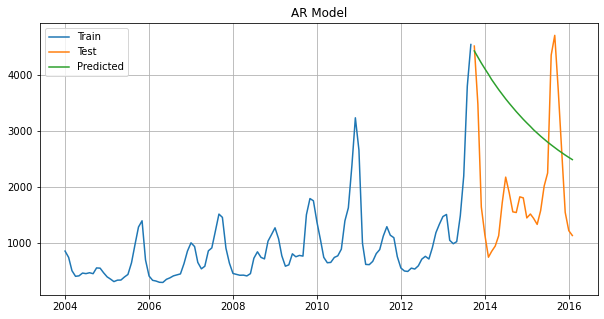

In [29]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m1,label='Predicted')
plt.title('AR Model')
plt.grid()
plt.legend()
plt.show()

In [30]:
ar_m1_aic = ar_m1.aic
print('AIC_m1',ar_m1_aic)
mse_m1,rmse_m1 = test_metrics(test,fcast_m1)
print('MSE_m1',mse_m1,'RMSE_m1',rmse_m1)

AIC_m1 1697.8638207436597
MSE_m1 3332472.892633018 RMSE_m1 1825.5062017514533


In [31]:
r1 = pd.DataFrame({'Model':'AR(1,0,0)','MSE':mse_m1,'RMSE':rmse_m1,'AIC':ar_m1_aic},index=[0])
r1

,Model,MSE,RMSE,AIC
0,"AR(1,0,0)",3.332473e+06,1825.506202,1697.863821


## Base MA model (0,0,1)

In [32]:
m2 = ARIMA(train,order=(0,0,1))
ar_m2 = m2.fit()
print(ar_m2.summary())

                               SARIMAX Results                                
Dep. Variable:               priceMod   No. Observations:                  117
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -867.611
Date:                Mon, 19 Sep 2022   AIC                           1741.222
Time:                        16:24:16   BIC                           1749.509
Sample:                    01-01-2004   HQIC                          1744.586
                         - 09-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        901.2449    110.762      8.137      0.000     684.156    1118.334
ma.L1          0.9988      0.157      6.377      0.000       0.692       1.306
sigma2       1.55e+05   2.14e+04      7.237      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [33]:
fcast_m2 = ar_m2.forecast(29)
fcast_m2

2013-10-01    2303.020326
2013-11-01     901.244927
2013-12-01     901.244927
2014-01-01     901.244927
2014-02-01     901.244927
2014-03-01     901.244927
2014-04-01     901.244927
2014-05-01     901.244927
2014-06-01     901.244927
2014-07-01     901.244927
2014-08-01     901.244927
2014-09-01     901.244927
2014-10-01     901.244927
2014-11-01     901.244927
2014-12-01     901.244927
2015-01-01     901.244927
2015-02-01     901.244927
2015-03-01     901.244927
2015-04-01     901.244927
2015-05-01     901.244927
2015-06-01     901.244927
2015-07-01     901.244927
2015-08-01     901.244927
2015-09-01     901.244927
2015-10-01     901.244927
2015-11-01     901.244927
2015-12-01     901.244927
2016-01-01     901.244927
2016-02-01     901.244927
Freq: MS, Name: predicted_mean, dtype: float64

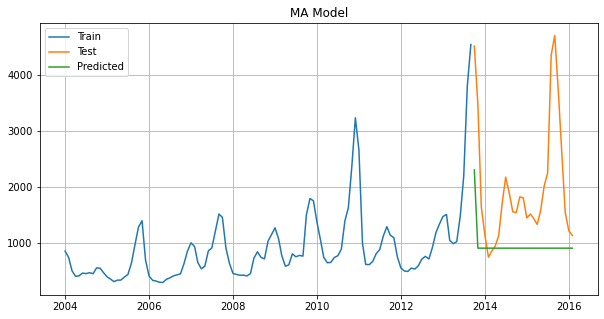

In [34]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m2,label='Predicted')
plt.title('MA Model')
plt.grid()
plt.legend()
plt.show()

In [35]:
ar_m2_aic = ar_m2.aic
print('AIC_m2',ar_m2_aic)
mse_m2,rmse_m2 = test_metrics(test,fcast_m2)
print('MSE_m2',mse_m2,'RMSE_m2',rmse_m2)

AIC_m2 1741.2220896248707
MSE_m2 2096548.2124927212 RMSE_m2 1447.9462049719668


In [36]:
r2 = pd.DataFrame({'Model':'MA(0,0,1)','MSE':mse_m2,'RMSE':rmse_m2,'AIC':ar_m2_aic},index=[1])
r2

,Model,MSE,RMSE,AIC
1,"MA(0,0,1)",2.096548e+06,1447.946205,1741.22209


## Base ARMA model (1,0,1) 

In [37]:
m3 = ARIMA(train,order=(1,0,1))
ar_m3 = m3.fit()
print(ar_m3.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               priceMod   No. Observations:                  117
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -822.750
Date:                Mon, 19 Sep 2022   AIC                           1653.499
Time:                        16:24:19   BIC                           1664.548
Sample:                    01-01-2004   HQIC                          1657.985
                         - 09-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1111.3215    471.628      2.356      0.018     186.948    2035.695
ar.L1          0.8843      0.050     17.748      0.000       0.787       0.982
ma.L1          0.5991      0.074      8.049      0.0

In [38]:
fcast_m3 = ar_m3.forecast(29)
fcast_m3

2013-10-01    4261.543148
2013-11-01    3897.134488
2013-12-01    3574.879583
2014-01-01    3289.902207
2014-02-01    3037.890202
2014-03-01    2815.030228
2014-04-01    2617.950060
2014-05-01    2443.667565
2014-06-01    2289.545573
2014-07-01    2153.251973
2014-08-01    2032.724429
2014-09-01    1926.139167
2014-10-01    1831.883385
2014-11-01    1748.530844
2014-12-01    1674.820286
2015-01-01    1609.636356
2015-02-01    1551.992718
2015-03-01    1501.017131
2015-04-01    1455.938255
2015-05-01    1416.073975
2015-06-01    1380.821081
2015-07-01    1349.646142
2015-08-01    1322.077430
2015-09-01    1297.697789
2015-10-01    1276.138315
2015-11-01    1257.072780
2015-12-01    1240.212691
2016-01-01    1225.302930
2016-02-01    1212.117887
Freq: MS, Name: predicted_mean, dtype: float64

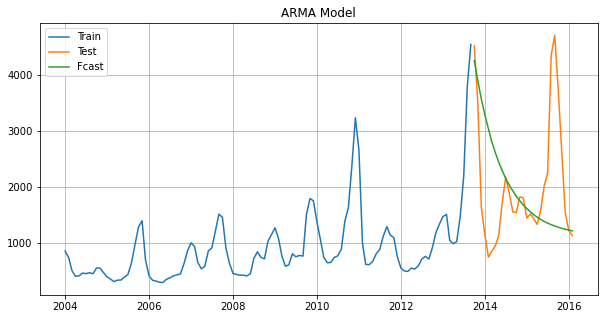

In [39]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m3,label='Fcast')
plt.title('ARMA Model')
plt.grid()
plt.legend()
plt.show()

In [40]:
ar_m3_aic = ar_m3.aic
print('AIC_m3',ar_m3_aic)
mse_m3,rmse_m3 = test_metrics(test,fcast_m3)
print('MSE_m3',mse_m3,'RMSE_m3',rmse_m3)

AIC_m3 1653.4990457641975
MSE_m3 1834772.3192013868 RMSE_m3 1354.5376772911807


In [41]:
r3 = pd.DataFrame({'Model':'ARMA(1,0,1)','MSE':mse_m3,'RMSE':rmse_m3,'AIC':ar_m3_aic},index=[2])
r3

,Model,MSE,RMSE,AIC
2,"ARMA(1,0,1)",1.834772e+06,1354.537677,1653.499046


## Base ARIMA model (1,1,1)

In [42]:
m4 = ARIMA(train,order=(1,1,1))
ar_m4 = m4.fit()
print(ar_m4.summary())

                               SARIMAX Results                                
Dep. Variable:               priceMod   No. Observations:                  117
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -814.460
Date:                Mon, 19 Sep 2022   AIC                           1634.919
Time:                        16:24:20   BIC                           1643.180
Sample:                    01-01-2004   HQIC                          1638.273
                         - 09-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2668      0.088      3.029      0.002       0.094       0.439
ma.L1          0.4124      0.104      3.963      0.000       0.208       0.616
sigma2      7.316e+04   5148.448     14.210      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [43]:
fcast_m4 = ar_m4.forecast(29)
fcast_m4

2013-10-01    4666.830232
2013-11-01    4698.002034
2013-12-01    4706.319070
2014-01-01    4708.538162
2014-02-01    4709.130244
2014-03-01    4709.288219
2014-04-01    4709.330369
2014-05-01    4709.341615
2014-06-01    4709.344616
2014-07-01    4709.345416
2014-08-01    4709.345630
2014-09-01    4709.345687
2014-10-01    4709.345702
2014-11-01    4709.345706
2014-12-01    4709.345707
2015-01-01    4709.345708
2015-02-01    4709.345708
2015-03-01    4709.345708
2015-04-01    4709.345708
2015-05-01    4709.345708
2015-06-01    4709.345708
2015-07-01    4709.345708
2015-08-01    4709.345708
2015-09-01    4709.345708
2015-10-01    4709.345708
2015-11-01    4709.345708
2015-12-01    4709.345708
2016-01-01    4709.345708
2016-02-01    4709.345708
Freq: MS, Name: predicted_mean, dtype: float64

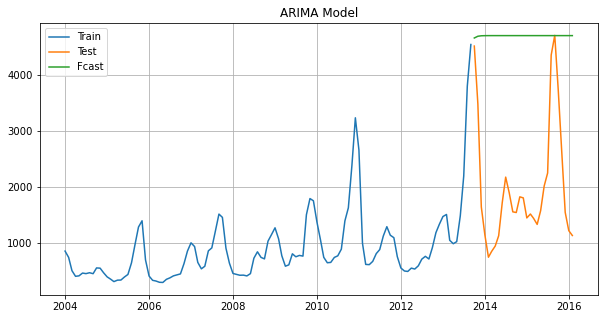

In [44]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m4,label='Fcast')
plt.title('ARIMA Model')
plt.grid()
plt.legend()
plt.show()

In [45]:
ar_m4_aic = ar_m4.aic
print('AIC_m4',ar_m4_aic)
mse_m4,rmse_m4 = test_metrics(test,fcast_m4)
print('MSE_m4',mse_m4,'RMSE_m4',rmse_m4)

AIC_m4 1634.9193158709818
MSE_m4 8560179.685524028 RMSE_m4 2925.778475128291


In [46]:
r4 = pd.DataFrame({'Model':'ARIMA(1,1,1)','MSE':mse_m4,'RMSE':rmse_m4,'AIC':ar_m4_aic},index=[3])
r4

,Model,MSE,RMSE,AIC
3,"ARIMA(1,1,1)",8.560180e+06,2925.778475,1634.919316


## Custom ARIMA

In [47]:
p = list(range(0,5)) 
q = list(range(0,5)) 
d = list(range(0,3)) 

pdq = []
rmse_arima = []
mse = []
for i in p:
    for j in d:
        for k in q:
            m = ARIMA(train,order=(i,j,k))
            m.initialize_approximate_diffuse()   # 
            arima = m.fit()
            ypred = arima.forecast(29)
            mean_sq_err = mean_squared_error(test,ypred)
            rmse=np.sqrt(mean_sq_err)
            rmse_arima.append(rmse)
            pdq.append((i,j,k))
            mse.append(mean_sq_err)
print(pdq)
print(rmse_arima)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting paramete

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 2, 0), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 2, 4), (4, 0, 0), (4, 0, 1), (4, 0, 2), (4, 0, 3), (4, 0, 4), (4, 1, 0), (4, 1, 1), (4, 1, 2), (4, 1, 3), (4, 1, 4), (4, 2, 0), (4, 2, 1), (4, 2, 2), (4, 2, 3), (4, 2, 4)]
[1545.9309332964067, 1443.0492199629011, 1365.2643104885021, 1341.626508138477, 1305.0405941622514, 2778.9162983262827, 2763.1789176304346, 2833.510528818056, 2492.4310270742

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Inference
The best value of (p,d,q) is(3,1,3) where rmse is 955.35.

In [48]:
min_rmse = min(rmse_arima)
print(min_rmse)
min_rmse_idx = rmse_arima.index(min_rmse)
print(min_rmse_idx)
print(pdq[min_rmse_idx])

955.3505895636983
53
(3, 1, 3)


## Custom ARIMA model (3,1,3) 

In [49]:
m5 = ARIMA(train,order=(3,1,3))
ar_m5 = m5.fit()
print(ar_m5.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               priceMod   No. Observations:                  117
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -807.795
Date:                Mon, 19 Sep 2022   AIC                           1629.591
Time:                        16:24:40   BIC                           1648.866
Sample:                    01-01-2004   HQIC                          1637.416
                         - 09-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3333      0.401      0.831      0.406      -0.453       1.119
ar.L2          0.4555      0.408      1.116      0.264      -0.344       1.255
ar.L3         -0.2746      0.332     -0.826      0.4

In [50]:
fcast_m5 = ar_m5.forecast(29)
fcast_m5

2013-10-01    4291.271760
2013-11-01    3434.740537
2013-12-01    2774.939376
2014-01-01    2235.952770
2014-02-01    1990.975242
2014-03-01    1845.002572
2014-04-01    1832.763557
2014-05-01    1829.464677
2014-06-01    1862.870776
2014-07-01    1875.863382
2014-08-01    1896.314548
2014-09-01    1899.876262
2014-10-01    1906.810510
2014-11-01    1905.128647
2014-12-01    1906.748325
2015-01-01    1904.618230
2015-02-01    1905.107722
2015-03-01    1903.856004
2015-04-01    1904.246596
2015-05-01    1903.672289
2015-06-01    1904.002448
2015-07-01    1903.743679
2015-08-01    1903.965488
2015-09-01    1903.830911
2015-10-01    1903.958128
2015-11-01    1903.878336
2015-12-01    1903.946632
2016-01-01    1903.898124
2016-02-01    1903.934970
Freq: MS, Name: predicted_mean, dtype: float64

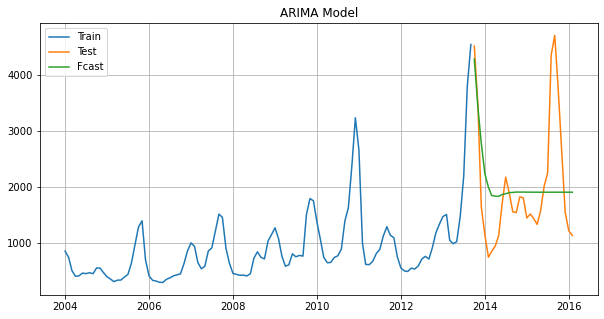

In [51]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m5,label='Fcast')
plt.title('ARIMA Model')
plt.grid()
plt.legend()
plt.show()

In [52]:
ar_m5_aic = ar_m5.aic
print('AIC_m5',ar_m5_aic)
mse_m5,rmse_m5 = test_metrics(test,fcast_m5)
print('MSE_m5',mse_m5,'RMSE_m5',rmse_m5)

AIC_m5 1629.590979836798
MSE_m5 931790.8534964091 RMSE_m5 965.2931438150844


In [53]:
r5 = pd.DataFrame({'Model':'Custom ARIMA(3,1,3)','MSE':mse_m5,'RMSE':rmse_m5,'AIC':ar_m5_aic},index=[4])
r5

,Model,MSE,RMSE,AIC
4,"Custom ARIMA(3,1,3)",931790.853496,965.293144,1629.59098


## Inference 
`Based on the RMSE score, the best model is Custom ARIMA(3,1,3) where the RMSE is at its least(965.293).`

In [54]:
res = pd.concat([r1,r2,r3,r4,r5])
res

,Model,MSE,RMSE,AIC
0,"AR(1,0,0)",3.332473e+06,1825.506202,1697.863821
1,"MA(0,0,1)",2.096548e+06,1447.946205,1741.222090
2,"ARMA(1,0,1)",1.834772e+06,1354.537677,1653.499046
3,"ARIMA(1,1,1)",8.560180e+06,2925.778475,1634.919316
4,"Custom ARIMA(3,1,3)",9.317909e+05,965.293144,1629.590980


## TES (Holt Winter Method)

In [55]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [56]:
alpha= 0.2
beta = 0.5
gamma = 0.3
m6 = ExponentialSmoothing(train)
tes_m6 = m6.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
print(tes_m6.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                 priceMod   No. Observations:                  117
Model:             ExponentialSmoothing   SSE                       34610932.049
Optimized:                         True   AIC                           1477.908
Trend:                             None   BIC                           1483.433
Seasonal:                          None   AICC                          1478.265
Seasonal Periods:                  None   Date:                 Mon, 19 Sep 2022
Box-Cox:                          False   Time:                         16:24:42
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2000000                alpha                False
initial_level              577.187

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Forecast of Onion Price for Mumbai Market using TES(Holt-Winter's Technique)

In [57]:
fcast_m6 = tes_m6.forecast(29)
fcast_m6

2013-10-01    2390.000092
2013-11-01    2390.000092
2013-12-01    2390.000092
2014-01-01    2390.000092
2014-02-01    2390.000092
2014-03-01    2390.000092
2014-04-01    2390.000092
2014-05-01    2390.000092
2014-06-01    2390.000092
2014-07-01    2390.000092
2014-08-01    2390.000092
2014-09-01    2390.000092
2014-10-01    2390.000092
2014-11-01    2390.000092
2014-12-01    2390.000092
2015-01-01    2390.000092
2015-02-01    2390.000092
2015-03-01    2390.000092
2015-04-01    2390.000092
2015-05-01    2390.000092
2015-06-01    2390.000092
2015-07-01    2390.000092
2015-08-01    2390.000092
2015-09-01    2390.000092
2015-10-01    2390.000092
2015-11-01    2390.000092
2015-12-01    2390.000092
2016-01-01    2390.000092
2016-02-01    2390.000092
Freq: MS, dtype: float64

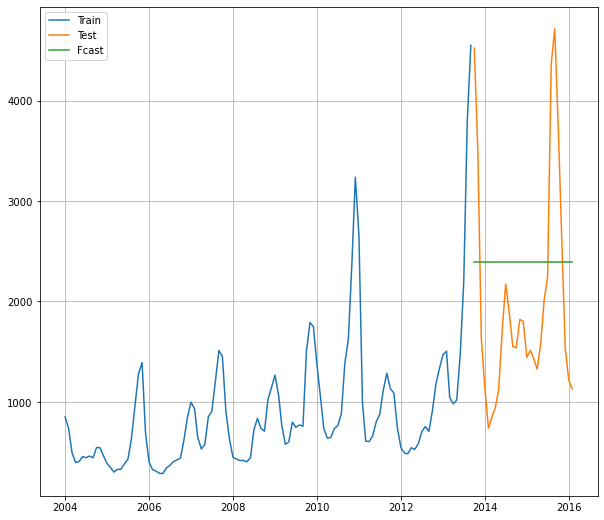

In [58]:
plt.figure(figsize=(10,9))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m6,label='Fcast')
plt.legend()
plt.grid()
plt.show()

In [59]:
tes_m6_aic = tes_m6.aic
print('AIC_m6',tes_m6_aic)
mse_m6,rmse_m6 = test_metrics(test,fcast_m6)
print('MSE_m6',mse_m6,'RMSE_m6',rmse_m6)

AIC_m6 1477.9082266290995
MSE_m6 1343374.4868708143 RMSE_m6 1159.0403301312747


In [60]:
r6 = pd.DataFrame({'Model':'TES(0.2,0.5,0.3)','MSE':mse_m4,'RMSE':rmse_m4,'AIC':ar_m4_aic},index=[5])
r6

,Model,MSE,RMSE,AIC
5,"TES(0.2,0.5,0.3)",8.560180e+06,2925.778475,1634.919316


# Final Tabulation of all the models
## Inference<br>
* `Custom ARIMA(3,1,3) performed the best out of all the six models, hence it is the most reliable in predicting/forecasting onion prices.`

In [61]:
final_result = pd.concat([r1,r2,r3,r4,r5,r6])
final_result

,Model,MSE,RMSE,AIC
0,"AR(1,0,0)",3.332473e+06,1825.506202,1697.863821
1,"MA(0,0,1)",2.096548e+06,1447.946205,1741.222090
2,"ARMA(1,0,1)",1.834772e+06,1354.537677,1653.499046
3,"ARIMA(1,1,1)",8.560180e+06,2925.778475,1634.919316
4,"Custom ARIMA(3,1,3)",9.317909e+05,965.293144,1629.590980
5,"TES(0.2,0.5,0.3)",8.560180e+06,2925.778475,1634.919316
